<a href="https://colab.research.google.com/github/Yoavvvvvv/Computer-vision/blob/main/Face_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
pip install datasets

In [47]:
from datasets import load_dataset

from tqdm import tqdm
import matplotlib.pyplot as plt

In [48]:
from datasets import load_dataset, Image

#it takes about 5 min to load the dataset
dataset = load_dataset("student/celebA", split="train")

##Data Preprocessing - Resize images into subset

In [49]:
dataset.shape

(202599, 1)

In [50]:
def resize_images(dataset_name, output_size=(100, 100)):
     for ind in range(202599):
        dataset[ind]["image"] = resize_image(dataset[ind]["image"])

In [51]:
def resize_image(img, output_size=(28, 28)):
    return img.resize(output_size)

In [52]:
def resize_images_subset(dataset_name,n, output_size=(75, 75)):
  subset = dataset_name[:n]["image"]
  for ind in range(n):
    subset[ind] = subset[ind].resize(output_size)
  return subset

In [79]:
subset = resize_images_subset(dataset,5000)

In [80]:
subset[0].size

(75, 75)

## Face embeddings

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

In [82]:
# Preprocess the images
preprocessed_images = np.array([preprocess_input(image.img_to_array(img)) for img in subset])

In [83]:
# Load a pre-trained InceptionV3 model without the top
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

In [84]:
# Extract features from the preprocessed images using the InceptionV3 model
features = base_model.predict(preprocessed_images)

157/157 [==============================] - 55s 341ms/step


In [85]:
# Flatten the features
features_flat = features.reshape(features.shape[0], -1)

In [86]:
# Apply PCA dimensionality reduction and embedding
pca = PCA(n_components=128)
embeddings = pca.fit_transform(features_flat)

In [ ]:
# Apply TNSE dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

In [90]:
kmeans = KMeans(n_clusters=100, random_state=42)
clusters = kmeans.fit_predict(embeddings_3d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


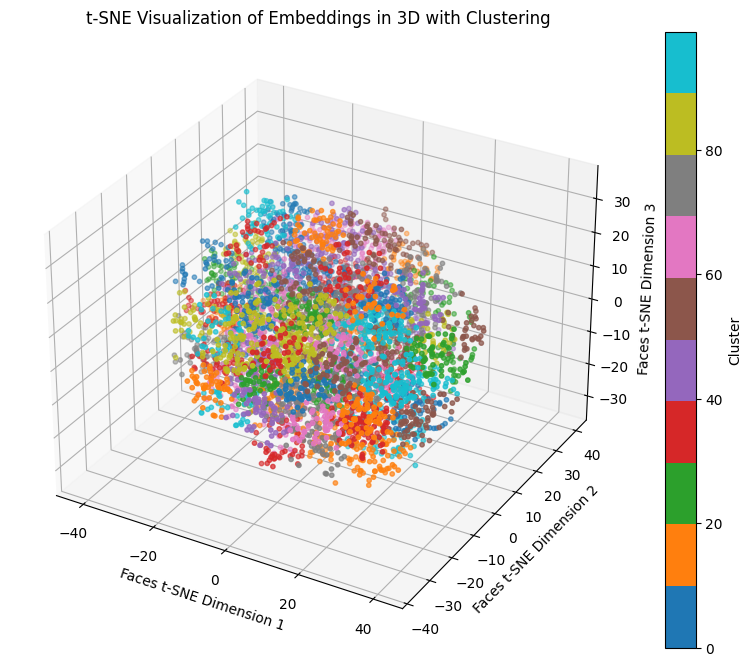

In [103]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=clusters, cmap='tab10', s=10)

# Add color bar
plt.colorbar(scatter, label='Cluster')

# Set labels for axes
ax.set_xlabel('Faces t-SNE Dimension 1')
ax.set_ylabel('Faces t-SNE Dimension 2')
ax.set_zlabel('Faces t-SNE Dimension 3')

plt.title('t-SNE Visualization of Embeddings in 3D with Clustering')
plt.show()

<ipython-input-102-6df8da4bdab9>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(cluster_embeddings[:, 0], cluster_embeddings[:, 1], cluster_embeddings[:, 2], cmap='tab10', s=10)


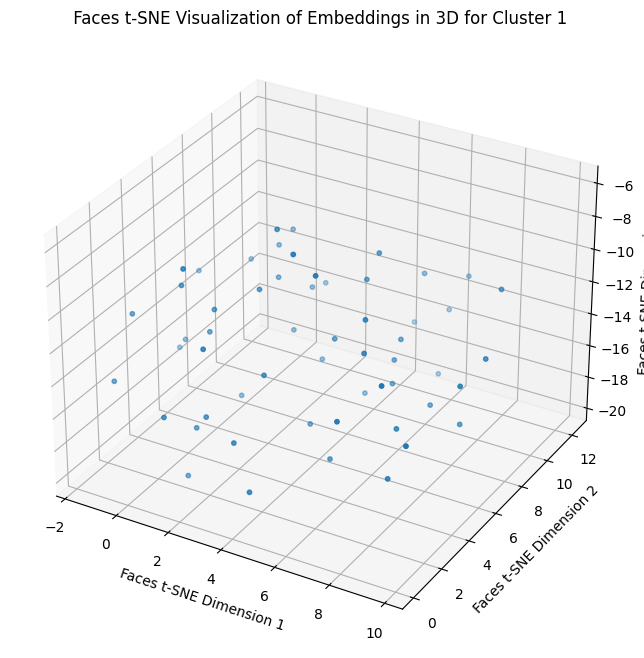

In [102]:
# Filter the embeddings and cluster labels to include only the points belonging to the chosen cluster
cluster_indices = np.where(clusters == 1)[0]
cluster_embeddings = embeddings_3d[cluster_indices]

# Plot the embeddings in 3D for the chosen cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(cluster_embeddings[:, 0], cluster_embeddings[:, 1], cluster_embeddings[:, 2], cmap='tab10', s=10)

# Set labels for axes
ax.set_xlabel('Faces t-SNE Dimension 1')
ax.set_ylabel('Faces t-SNE Dimension 2')
ax.set_zlabel('Faces t-SNE Dimension 3')

plt.title(f' Faces t-SNE Visualization of Embeddings in 3D for Cluster {1}')
plt.show()

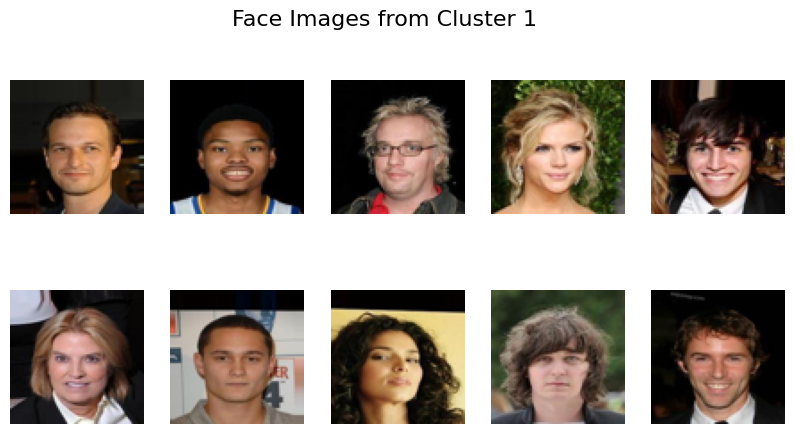

In [97]:
# Locating faces from cluster
cluster_face_images = [subset[i] for i in cluster_indices]

# Plot the face images
plt.figure(figsize=(10, 5))
for i in range(min(len(cluster_face_images), 10)):  # Plot up to 10 face images from the cluster
    plt.subplot(2, 5, i+1)
    plt.imshow(cluster_face_images[i], cmap='gray')  # Assuming grayscale face images
    plt.axis('off')
plt.suptitle(f'Face Images from Cluster {1}', fontsize=16)
plt.show()